In [13]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as  pd
import pandas_profiling
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import log_loss, f1_score, r2_score,confusion_matrix, classification_report,roc_curve, auc
from sklearn.decomposition import PCA, TruncatedSVD
%matplotlib inline

# Play with some classical dataset

In [49]:
from sklearn.datasets import load_digits

digits = load_digits()

test PCA

In [51]:
#train classifier

clf_dime_red = PCA(n_components=3,svd_solver="randomized")
new_X = clf_dime_red.fit_transform(digits.data)

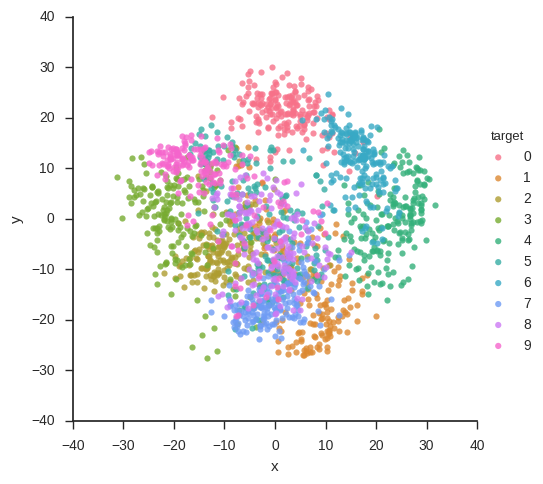

In [52]:
# create auxliray data and plot

plot_df = pd.DataFrame.from_records(data=new_X[:,:2],columns=["x","y"])
plot_df["target"] = digits.target

sns.set(style="ticks")
sns.lmplot("x","y",data=plot_df,hue="target",fit_reg=False)

test rsvd

In [57]:
clf_svd = TruncatedSVD()
svd_X = clf_svd.fit_transform(digits.data)

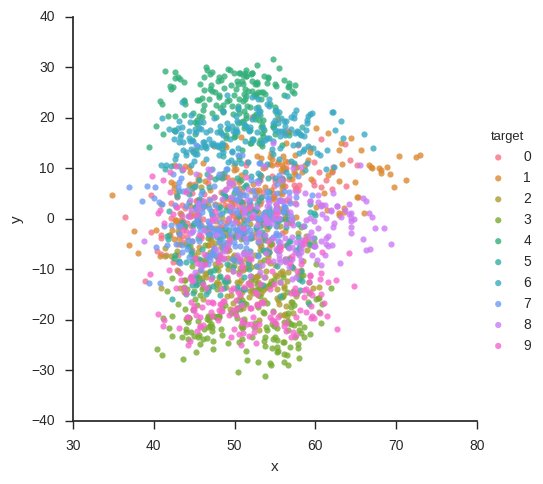

In [60]:
# create dataframe for drawing and plot results

plot_df = pd.DataFrame.from_records(data=svd_X[:,:2],columns=["x","y"])
plot_df["target"] = digits.target

sns.set(style="ticks")
sns.lmplot("x","y",data=plot_df,hue="target",fit_reg=False)

Transformation via t-SNE

In [66]:
from sklearn.manifold import TSNE

embedding = TSNE(n_components=2).fit_transform(digits.data)

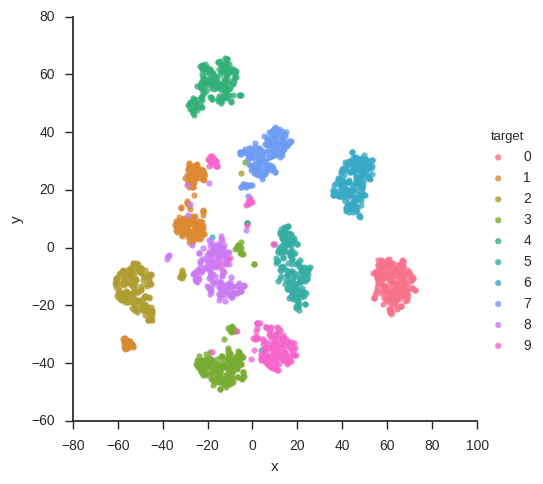

In [67]:
# create dataframe for drawing and plot results

plot_df = pd.DataFrame.from_records(data=embedding[:,:2],columns=["x","y"])
plot_df["target"] = digits.target

sns.set(style="ticks")
sns.lmplot("x","y",data=plot_df,hue="target",fit_reg=False)

Transformation via UMAP

In [61]:
import umap


embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(digits.data)

/usr/local/lib/python3.5/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


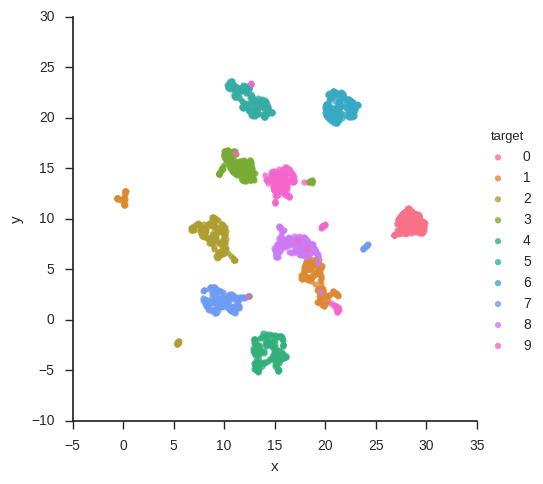

In [62]:
# create auxliray data and plot

plot_df = pd.DataFrame.from_records(data=embedding,columns=["x","y"])
plot_df["target"] = digits.target

sns.set(style="ticks")
sns.lmplot("x","y",data=plot_df,hue="target",fit_reg=False)

In [63]:
# test usual euclidian metric

embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3).fit_transform(digits.data)

/usr/local/lib/python3.5/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


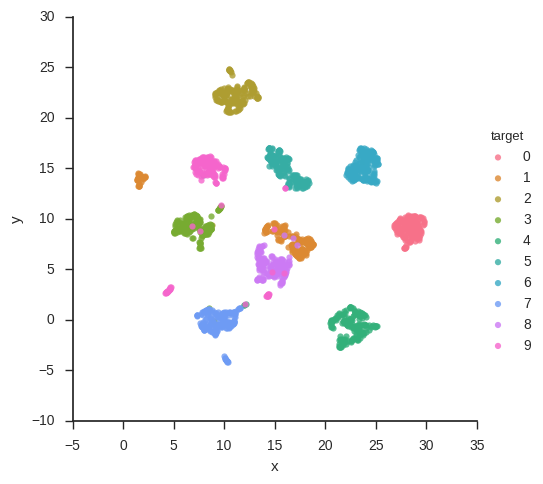

In [64]:
# create auxliray data and plot

plot_df = pd.DataFrame.from_records(data=embedding,columns=["x","y"])
plot_df["target"] = digits.target

sns.set(style="ticks")
sns.lmplot("x","y",data=plot_df,hue="target",fit_reg=False)

# Summary regarding digits

As you could see, both pca and svd don't work well.  
Both t-sne and umap showed relevant results (almost all categories could be visually dvided using only 2D picture)

# Working with real dataset

Load data

In [2]:
df = pd.read_csv("./TS_Summer_2018/data.csv",delimiter=";")

In [4]:
df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


Profiling

In [5]:
# profiling
pandas_profiling.ProfileReport(df)

Number of variables,21
Number of observations,41188
Total Missing (%),0.0%
Total size in memory,6.6 MiB
Average record size in memory,168.0 B
Numeric,8
Categorical,11
Date,0
Text (Unique),0
Rejected,2
Distinct count,78


Simple working with features

In [6]:
full_df = pd.get_dummies(df.drop("y",axis=1))

In [7]:
full_df = full_df.drop(["duration","euribor3m","nr.employed"],axis=1)

In [8]:
X = np.array(full_df)
y = np.array(df["y"])

In [20]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_n = label_encoder.fit_transform(y)

Play with dimensional reduction

In [9]:
# features normalization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
# train simple PCA

clf_dime_red = PCA(n_components=3,svd_solver="randomized")
new_X = clf_dime_red.fit_transform(X)

In [33]:
# create dataframe for drawing

plot_df = pd.DataFrame.from_records(data=new_X[:,:3],columns=["x","y","z"])
plot_df["target"] = y_n

In [34]:
plot_df

,x,y,z,target
0,-2.289899,2.091389,-0.048653,0
1,-2.826569,2.165117,0.579771,0
2,-1.701242,0.257679,1.365363,0
3,-1.958887,0.639130,1.252386,0
4,-1.958357,0.819418,1.568005,0
5,-2.976166,2.361234,0.373949,0
6,-1.778079,0.449735,0.924783,0
7,-3.033629,2.757497,0.092773,0
8,-1.170326,-1.530690,1.990361,0
9,-1.285014,-1.117422,2.723152,0


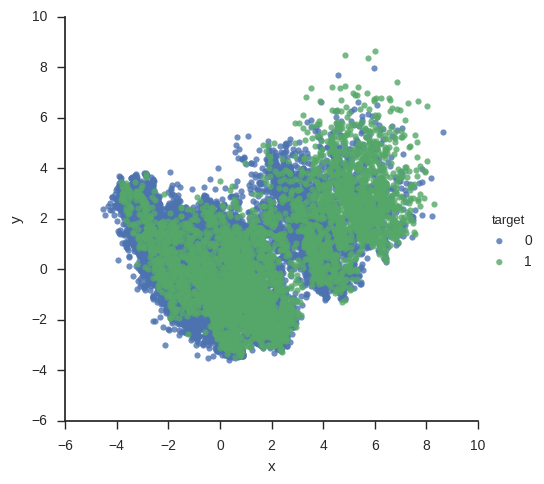

In [39]:
# create plot

sns.set(style="ticks")
sns.lmplot("x","y",data=plot_df,hue="target",fit_reg=False)

In [54]:
# train SVD

clf_svd = TruncatedSVD()
svd_X = clf_svd.fit_transform(X)

In [55]:
# create dataframe for drawing

plot_df = pd.DataFrame.from_records(data=svd_X[:,:2],columns=["x","y"])
plot_df["target"] = y_n

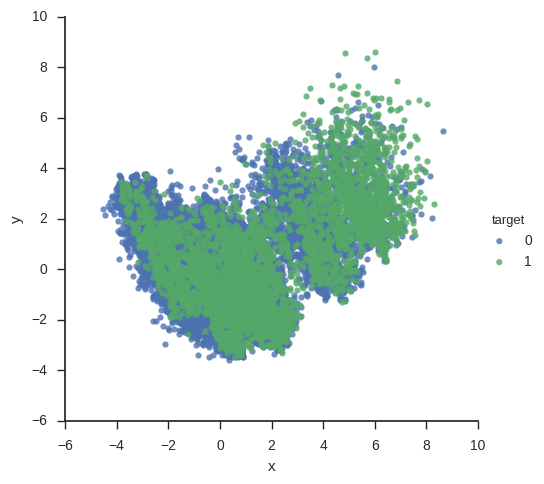

In [56]:
# create plot

sns.set(style="ticks")
sns.lmplot("x","y",data=plot_df,hue="target",fit_reg=False)

# Use non-linear transformation

In [68]:
embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,metric='cosine').fit_transform(X)

/usr/local/lib/python3.5/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 242 separate connected components using meta-embedding (experimental)
  n_components


In [69]:
# create dataframe for drawing

plot_df = pd.DataFrame.from_records(data=embedding,columns=["x","y"])
plot_df["target"] = y_n

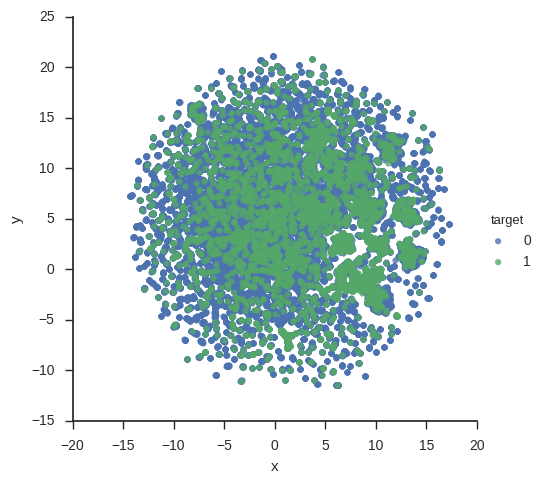

In [70]:
# create plot

sns.set(style="ticks")
sns.lmplot("x","y",data=plot_df,hue="target",fit_reg=False)

# Brief summary regarding real data

Here all approaches showed poor results.  
It is common situation for working with OHE.  
However, these methods could help if you process data using embeddings.

# Mahalanobis distance outlier detection

In [71]:
from scipy.stats import special_ortho_group

In [121]:
# get model data

N = 1000
init_dim = 10

scaling_list = [(np.exp(-.5*i)) for i in range(init_dim)]
D = np.eye(init_dim)
for i in range(init_dim):
    D[i,i] = scaling_list[i]

# make initial generation 

X = np.random.normal(size=(N,init_dim))
X = np.dot(X,D)

# produce som random 3-D rotations

for q in range(init_dim-3):
    rot_mat = special_ortho_group.rvs(3)
    for i in range(N):
        curr_vector = X[i,q:q+3]
        curr_vector = np.dot(curr_vector,rot_mat)
        X[i,q:q+3] = curr_vector
        
        
# inject some outliers in data

outliers = 10
y = np.zeros((N,1))
y[:outliers] = 1.0
X[:outliers,:] = X[:outliers,:] + np.random.normal(loc=0.2, scale=2.0, size=(outliers,init_dim))

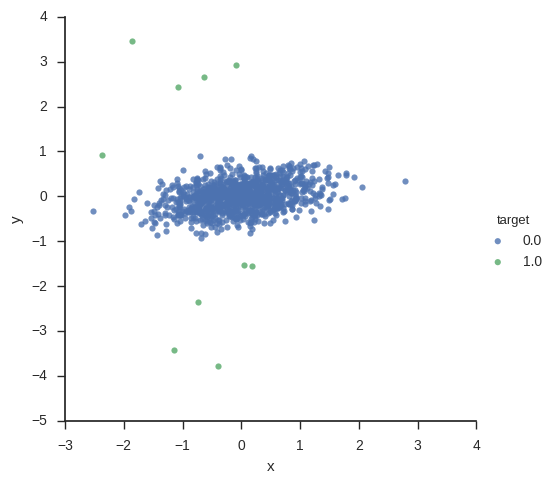

In [122]:
# create dataframe for drawing

plot_df = pd.DataFrame.from_records(data=X[:,:2],columns=["x","y"])
plot_df["target"] = y
sns.set(style="ticks")
sns.lmplot("x","y",data=plot_df,hue="target",fit_reg=False)

In [123]:
# calculate PCA

pca = PCA()
new_X = pca.fit_transform(X)

In [124]:
# Cumulative explained variance

tot = sum(pca.explained_variance_)
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
cum_var_exp = np.cumsum(var_exp)

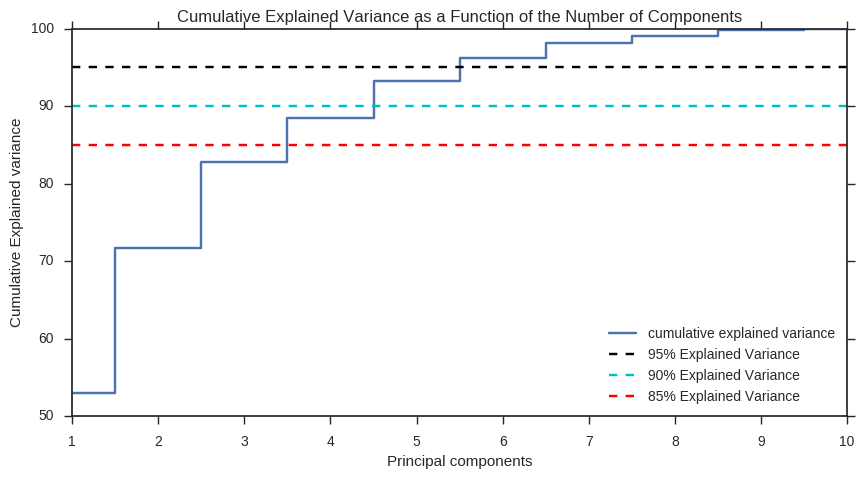

In [125]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 

plt.figure(figsize=(10, 5))
plt.step(range(1, 11), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

In [161]:
def calc_mahalanobis_dist(x, mu, inv_cov):
    x -= mu
    curr_vector_new = np.dot(x,inv_cov)
    return np.dot(x,curr_vector_new)

In [162]:
# estimate mean and covariance matrix

mean_x = np.mean(X,axis=0)
cov_matrix = np.cov(X.transpose())
inv_cov_matrix = np.linalg.inv(cov_matrix)

scores = [calc_mahalanobis_dist(X[i,:],mean_x,inv_cov_matrix) for i in range(N)]

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


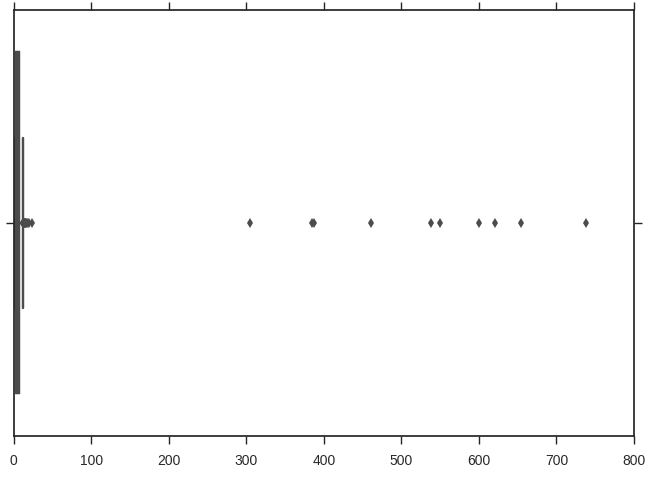

In [166]:
#draw boxpolot

sns.boxplot(scores)

In [171]:
# as a baseline approach for outlier detection we could use 3 sigma rule

mean_score = np.mean(scores)
std_score = np.std(scores)
out_thr = mean_score + 3*std_score

outliers_list = []
for i,val in enumerate(scores):
    if val > out_thr:
        outliers_list.append(i)
print(outliers_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# Conclusion

As you could see, our approach could detect these outstanding outliers 